In [1]:
#!pip install plotly

In [2]:
    import pandas as pd
    import pandas as pd
    import numpy as np
    import os
    from matplotlib import pyplot as plt 
    from statsmodels.tsa.seasonal import seasonal_decompose
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.ar_model import AR
    import warnings

In [3]:
def plot_timeseries(zip_df, cols):
     """This function will plot complete time series of all selected zipcodes"""
        
    import plotly.express as px
    fig = px.line(zip_df, x='Date', y=cols,title = "Individual plot for timerseries at different zip codes")
    fig.show()

In [4]:
def prediction(dataset , n_months, cols):
    """Predict prices at selected zipcodes for given no of months using cross validation """
    
    import warnings
    warnings.filterwarnings("ignore")
    dataset.Date= pd.to_datetime(dataset.Date)
    dataset = dataset.set_index('Date')
    pred_df_all = pd.DataFrame()
    for col in cols:
        x = dataset[[col]]
        for i in range(0,n_months):
            model = AR(x)
            model_fit = model.fit()
            predictions =model_fit.predict(start=len(x), end=len(x))
            predictions_df = pd.DataFrame(predictions,columns = [col])
            x = x.append(predictions_df)
        future_series = x[len(x)-n_months-1:]
        pred_df_all = pd.concat([pred_df_all,future_series],axis=1)
    print("The predicted value for the selected zip codes for next {} months".format(n_months))
    display(pred_df_all) 
#     pred_df_all.to_csv('/Users/shainan/Desktop/GROUP_PROJECT/zip_code_data/Predictions.csv')
    return pred_df_all

In [5]:
def test_df(dataset , n_months, cols):
    """Take test prices for selected zip codes, predict future prices and calculate MAPE"""
    
    import warnings
    warnings.filterwarnings("ignore")
    dataset.Date= pd.to_datetime(dataset.Date)
    dataset = dataset.set_index('Date')
    pred_df_all = pd.DataFrame()
    for col in cols:
        x = dataset[[col]]
        x = x[:len(x)-n_months]
        y_true = x[len(x)-n_months:].values
        for i in range(0,n_months):
            model = AR(x)
            model_fit = model.fit()
            predictions =model_fit.predict(start=len(x), end=len(x))
            predictions_df = pd.DataFrame(predictions,columns = [col])
            x = x.append(predictions_df)
        future_series = x[len(x)-n_months:] # Test Data
        pred_df_all = pd.concat([pred_df_all,future_series],axis=1)
        #Calculate MAPE for each test set
        y_pred = future_series.values
        MAPE = round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)
        print("MAPE for ZIP code {0} is {1} %".format(col,MAPE))
    return pred_df_all

In [6]:
def plot_observed_vs_predicted(dataset,pred_df_all,cols,n_months):
    """Plot predicted prices for selected zip codes based on Test data"""
    
    dataset.Date= pd.to_datetime(dataset.Date)
    dataset = dataset.set_index('Date')
    x = dataset
    for col in cols:
        plt.figure(figsize=(16, 12), dpi=70)
        plt.plot(x[col][len(x)-n_months:], label='Observed')
        plt.plot(pred_df_all[col], color='red', label='Predicted')
        plt.title("Plot for ZIP code {}".format(col))
        plt.legend()
        plt.show()

In [7]:
def plot_observed_test_predicted(dataset,pred_df_all,predictions,cols,n_months):
    """Plot all prices for selected zip codes from given data, test data prices and predicted prices in one graph"""
    
    dataset.Date= pd.to_datetime(dataset.Date)
    dataset = dataset.set_index('Date')
    x = dataset
    for col in cols:
        
        plt.figure(figsize=(16, 12), dpi=70)
        plt.plot(x[col],color = 'blue', label='Observed')
        plt.plot(pred_df_all[col], color='red', label='test')
        plt.plot(predictions[col], color='green', label='Predicted')
        plt.legend()
        plt.title("Plot for ZIP code {}".format(col))
        plt.axvline(x = predictions[col].index[0],color = 'black',linestyle='--')
        plt.axvline(x = pred_df_all[col].index[0],color = 'black',linestyle='--')
        plt.show()

In [8]:
#zip_df = pd.read_csv("/Users/shainan/Desktop/GROUP_PROJECT/zip_code_data/Microsoft Surrounding ZIP.csv")

In [9]:
#plot_timeseries(zip_df, cols = ['30076','30071', '30097', '30338','30093'] )

In [10]:
#predictions = prediction(dataset = zip_df , n_months=12, cols= ['30076','30071', '30097', '30338','30093'])

In [11]:
#predictions

In [12]:
#pred_df_all = test_df(dataset = zip_df ,n_months=12, cols=['30076','30071', '30097', '30338','30093'])

In [13]:
#plot_observed_vs_predicted(zip_df,pred_df_all,cols=['30076','30071', '30097', '30338','30093'],n_months = 12)

In [14]:
#plot_observed_test_predicted(zip_df,pred_df_all,predictions,cols=['30076','30071', '30097', '30338','30093'],n_months=12)

In [15]:
def main():
    import pandas as pd
    import pandas as pd
    import numpy as np
    import os
    from matplotlib import pyplot as plt 
    from statsmodels.tsa.seasonal import seasonal_decompose
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.ar_model import AR
    import warnings
    warnings.filterwarnings("ignore")
    zip_df = pd.read_csv("/Users/shainan/Desktop/GROUP_PROJECT/zip_code_data/Microsoft Surrounding ZIP.csv")
    n_month_predictions = 24
    n_months_test=12
    cols= ['30076','30071', '30097', '30338','30093']
    plot_timeseries(zip_df, cols = cols )
    predictions = prediction(dataset = zip_df , n_months=n_month_predictions, cols= cols)
    pred_df_all = test_df(dataset = zip_df ,n_months=n_months_test, cols=cols)
    plot_observed_vs_predicted(zip_df,pred_df_all,cols=cols,n_months = n_months_test)
    plot_observed_test_predicted(zip_df,pred_df_all,predictions,cols=cols,n_months=n_months_test)

The predicted value for the selected zip codes for next 24 months


,30076,30071,30097,30338,30093
2020-10-31,393783.000000,220803.000000,469842.000000,511172.000000,201958.000000
2020-11-30,396948.241678,222838.663297,473068.386409,515499.852767,204426.826190
2020-12-31,399782.911236,224804.415475,475881.924045,519531.336010,206859.333155
2021-01-31,402155.926199,226488.458744,477930.121989,522622.060668,209037.352173
2021-02-28,404106.108497,228272.091817,479799.600832,525358.514038,211148.130773
2021-03-31,406876.350980,229868.558159,481889.178848,527638.796383,213046.857229
2021-04-30,409578.495992,231490.097902,484059.275051,530048.116000,214882.444227
2021-05-31,412945.193354,232916.543521,486622.134346,532298.233923,216545.835133
2021-06-30,415576.332431,234194.813693,488485.457221,534034.000274,218058.755766
2021-07-31,418246.667869,235268.271260,490112.991992,535166.293370,219432.141162


MAPE for ZIP code 30076 is 0.65 %
MAPE for ZIP code 30071 is 1.82 %
MAPE for ZIP code 30097 is 0.42 %
MAPE for ZIP code 30338 is 0.84 %
MAPE for ZIP code 30093 is 4.26 %


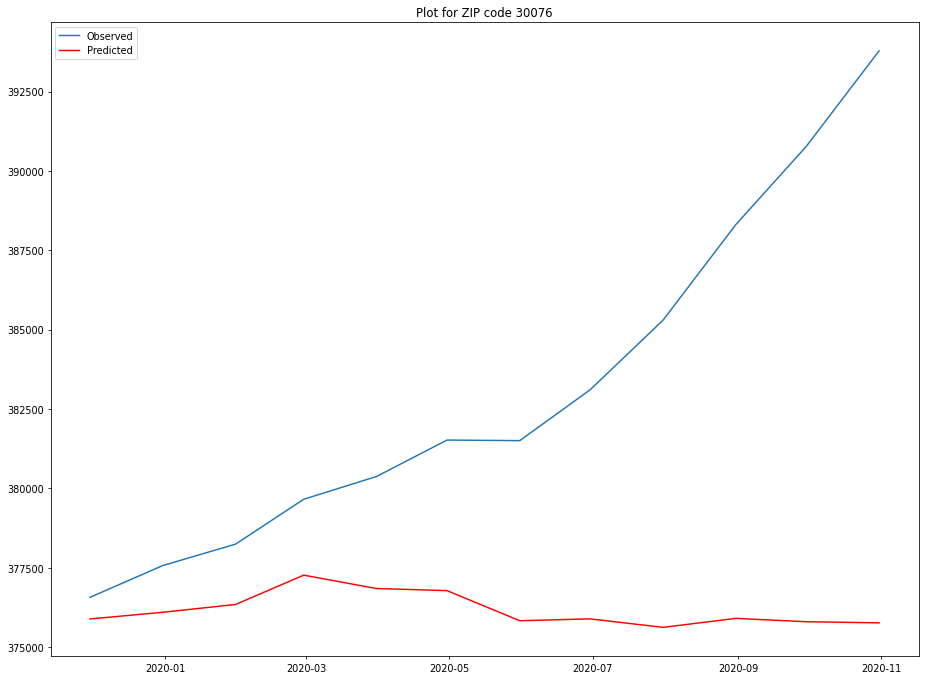

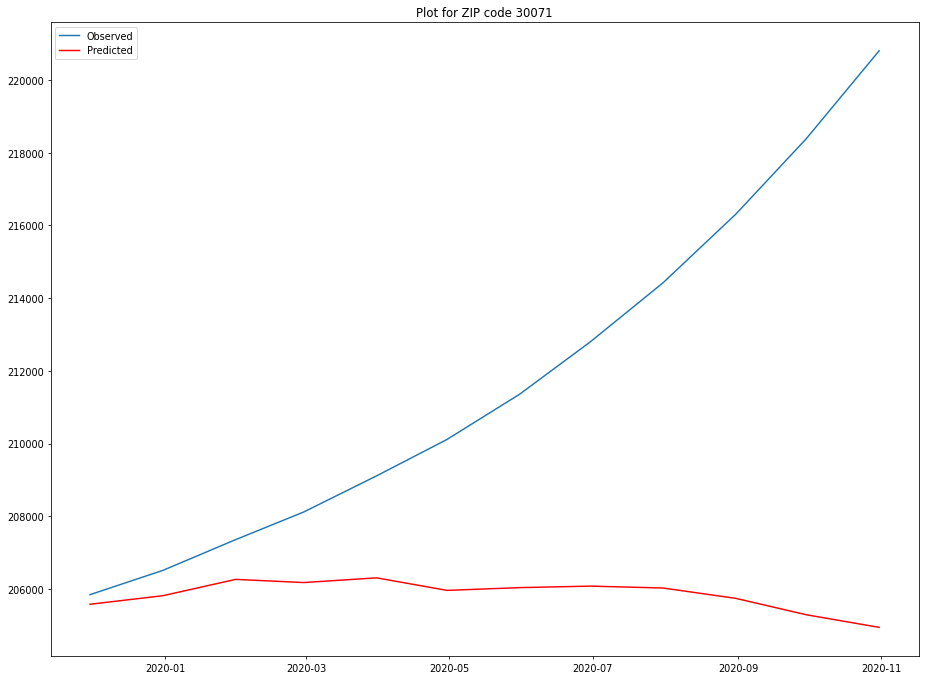

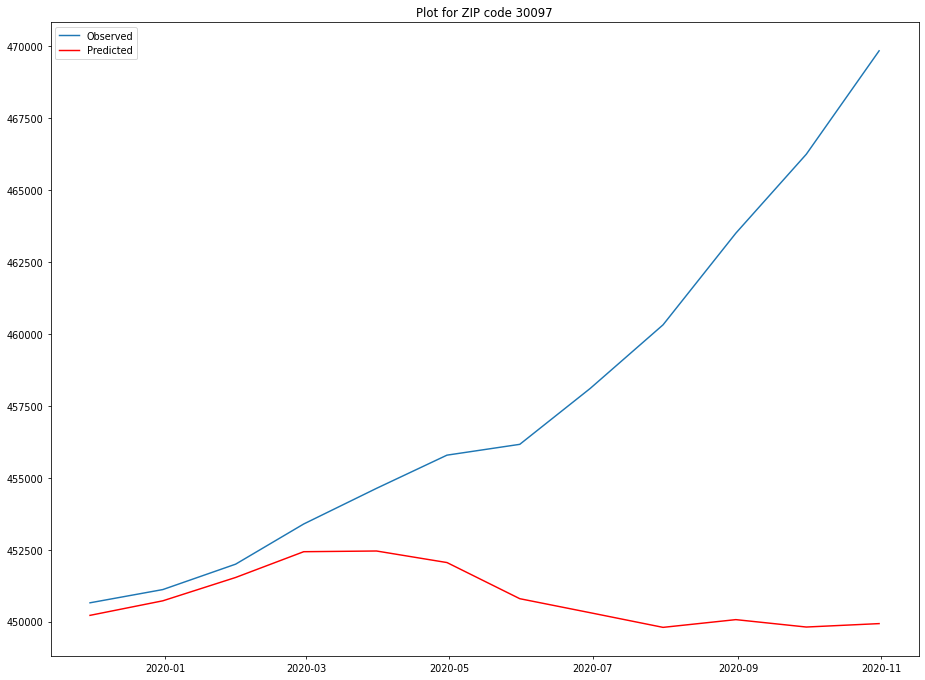

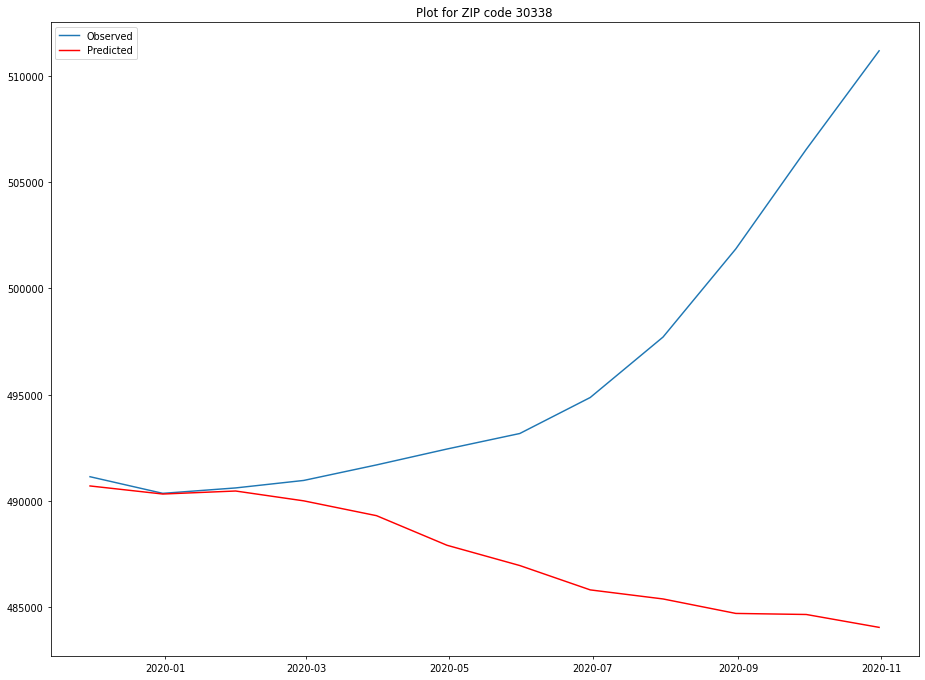

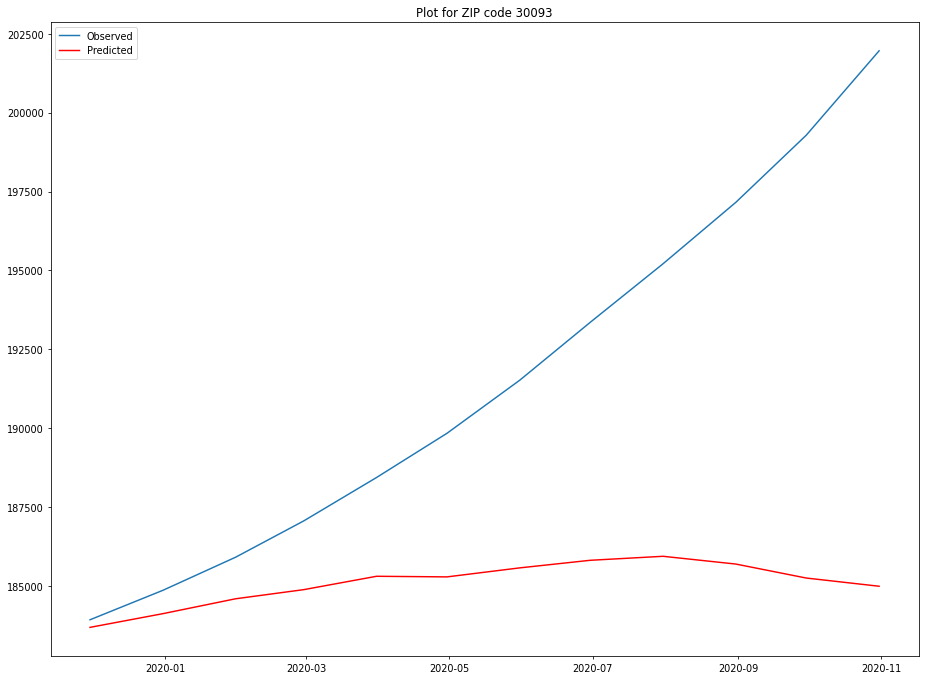

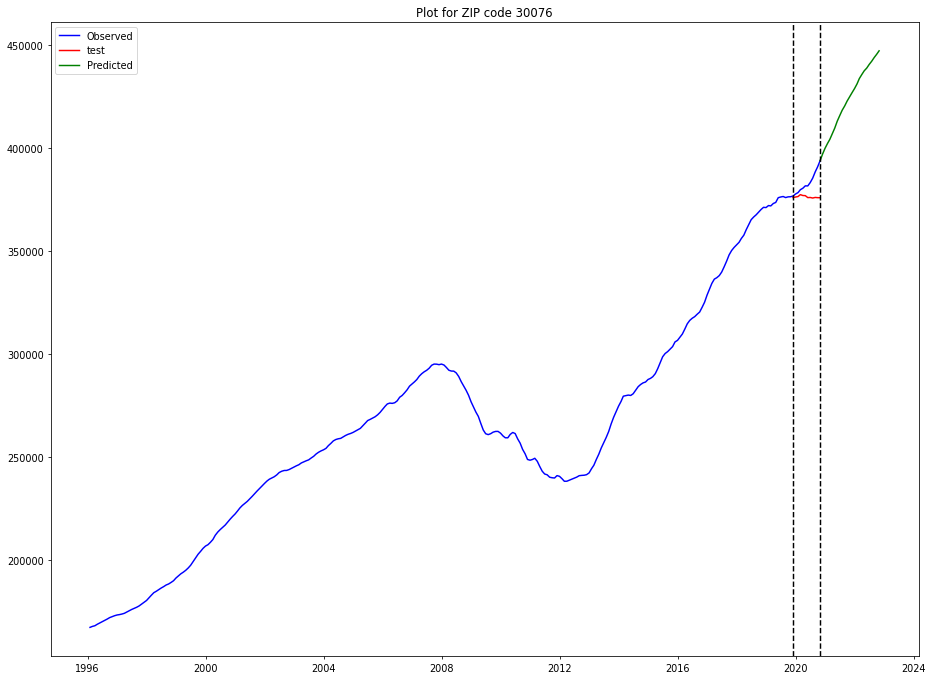

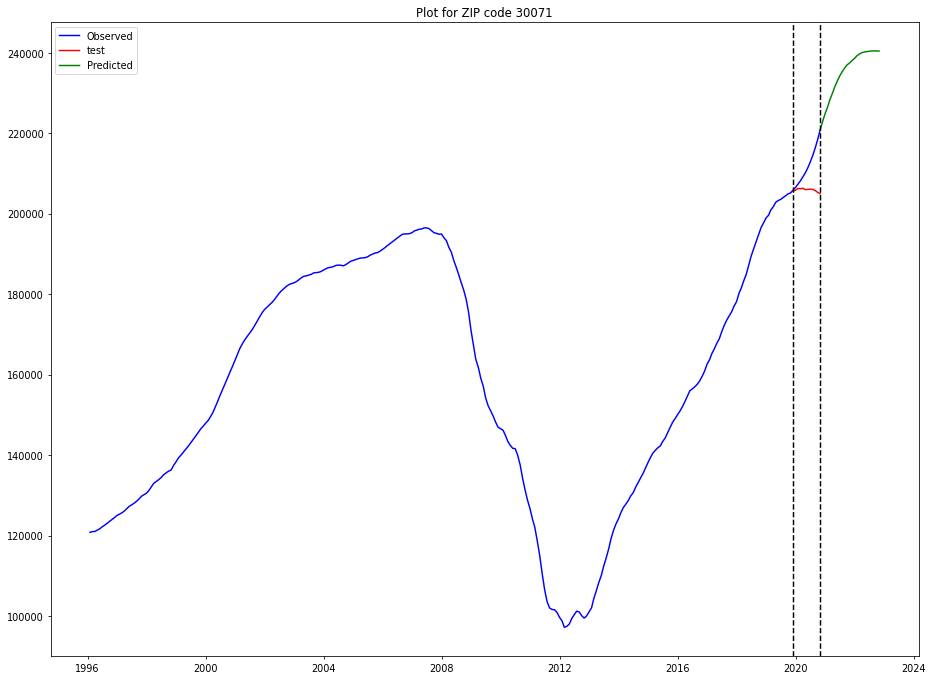

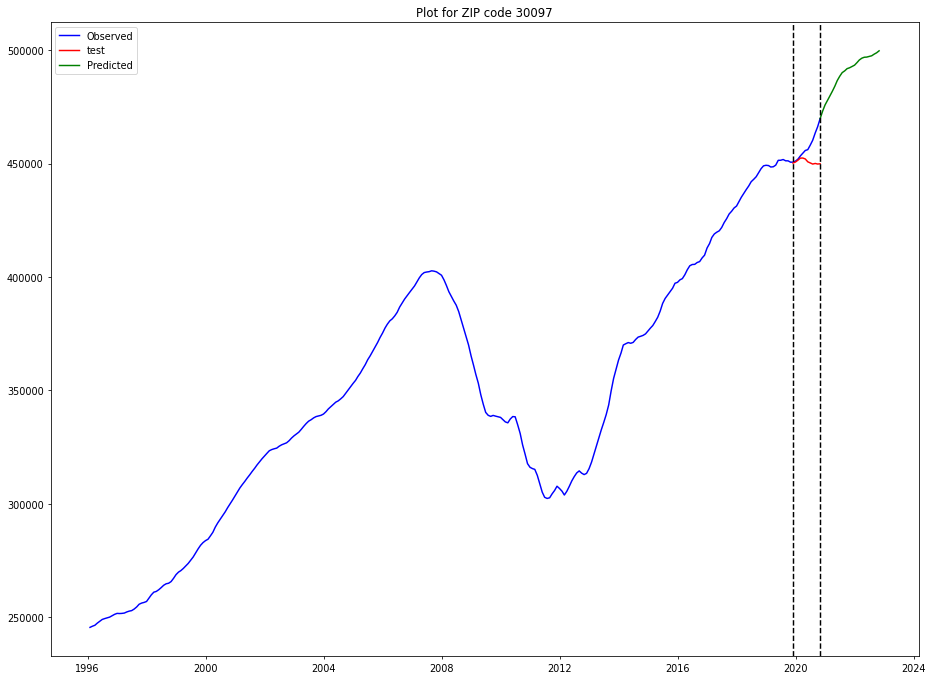

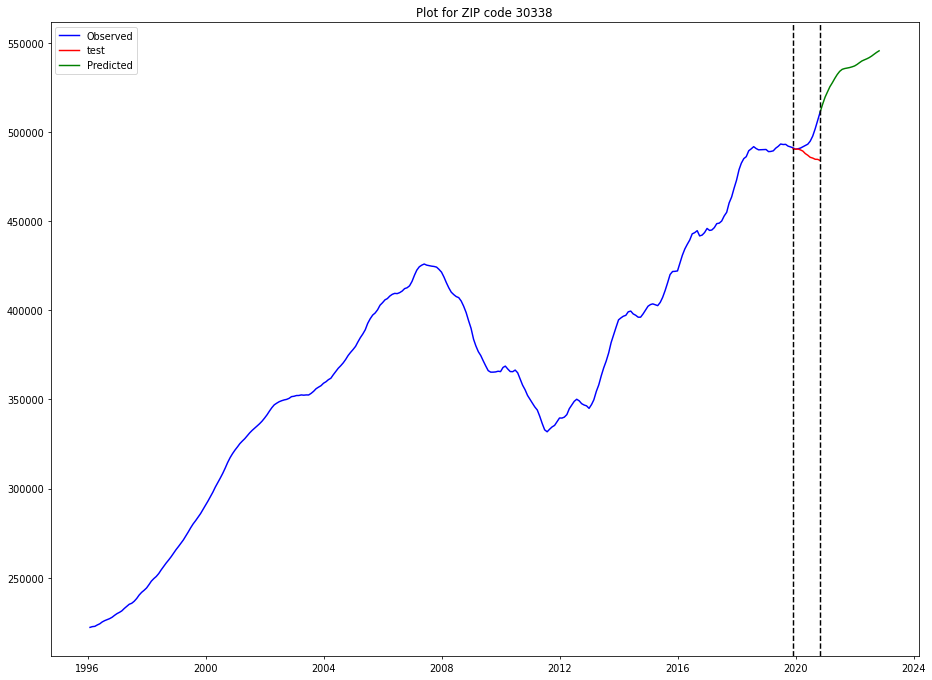

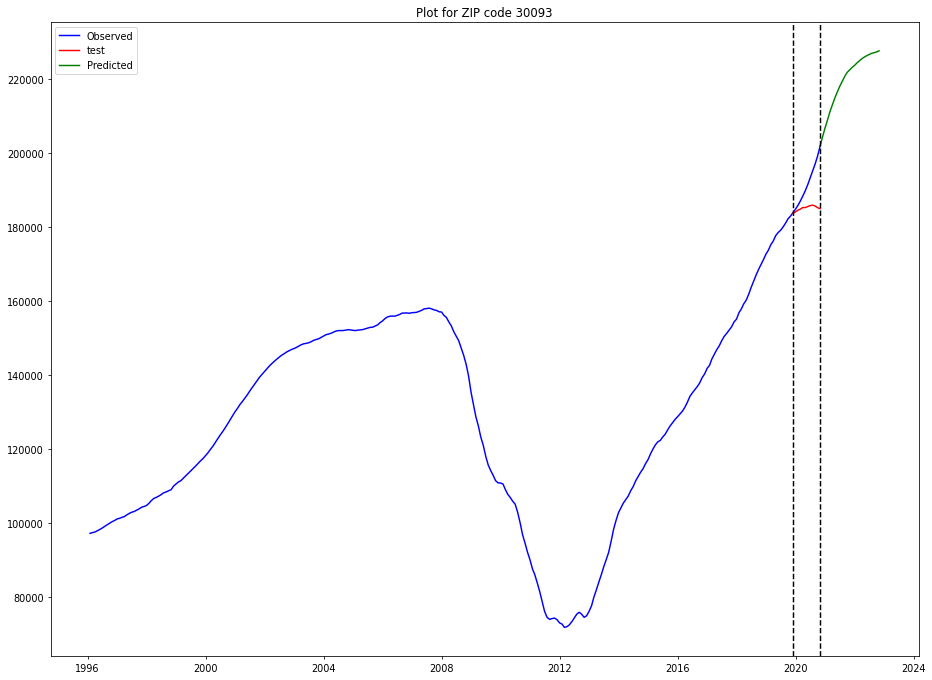

In [16]:
main()